In [4]:
import iris
import numpy as np
import matplotlib.pyplot as plt
import os
import cmocean
import warnings

In [5]:
os.chdir("/home/548/eh6215/Desktop/python/BARPA_evaluation/emma/lib")
from plotting_functions import bias_plots

In [8]:
cx = iris.Constraint(longitude=lambda x: 140<=x<=155)
cy = iris.Constraint(latitude =lambda y: -10.5>=y>=-44)
   
names = {'agcd':'agcd','barpaR-E': "BARPA-EASTAUS_12km", 'barpaC-T':"BARPAC-T_km4p4","barpaC-M":"BARPAC-M_km2p2"}
    
lsm = iris.load_cube("/home/548/eh6215/lsm.nc","land_binary_mask").extract(cx&cy)[:-1]
#lsm.data  = np.m.masked_array(np.ones(lsm.shape),mask=1-lsm.data)
data = {}
ct = iris.Constraint(time=lambda t:t.point.month in [12,1,2] and t.point.year >= 1991 and t.point.year <1996)
for domain in ['agcd',"barpaR-E","barpaC-T","barpaC-M"]:
    data[domain] = {}
    data[domain]['wet days']= iris.load("/short/tp28/eh6215/ESCI/daily_pr/wetdays_2_%s_*.nc"%names[domain]).extract(cx&cy&ct)
    iris.util.equalise_attributes(data[domain]['wet days'])
    data[domain]['wet days'] = data[domain]['wet days'].concatenate_cube()
    data[domain]['wet days'].rename('wet days')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'agcd_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'barpa_eastaus_12km_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'barpa_eastaus_12km_wet_days' contains unknown cell method 'proportion'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/

In [14]:
cy2 = iris.Constraint(latitude=lambda y: y>-30)
cy3 = iris.Constraint(latitude=lambda y: y<=-30)

tmp = iris.cube.CubeList([data["barpaC-T"]['wet days'].extract(cy2),data['barpaC-M']['wet days'].extract(cy3)])
iris.util.equalise_attributes(tmp)
tmp=tmp.concatenate_cube()
data['barpaC']={}
data['barpaC']['wet days']=tmp
cy2 = iris.Constraint(latitude =lambda y: -10.5>=y>=-44)

ConcatenateError: failed to concatenate into a single cube.
  Cube metadata differs for phenomenon: wet days
  Dimension coordinates metadata differ: time, latitude, longitude != time, latitude, longitude
  Auxiliary coordinates differ: day, doyr, forecast_period, forecast_reference_time != day
  Scalar coordinates differ: hour != < None >

ValueError: Insufficient matching coordinate metadata to resolve cubes, cannot map dimensions (0, 1) of the RHS cube 'wet days' to the LHS cube 'wet days'.

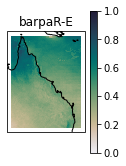

In [ ]:
plt.figure(figsize=(8,12))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    bias_plots(data,'wet days',1-lsm.extract(cy2).data,["barpaR-E","barpaC-T",'barpaC-M',"agcd"],0,1,0.5,cmocean.cm.rain,'bwr_r',"1",Constraints=cy2&ct)

In [15]:
plt.figure()
bias_plots(data,'wet days',1-lsm.extract(cy2).data,["BARPA-EASTAUS_12km","BARPAC-M_km2p2","agcd"],0,1,0.2,cmocean.cm.rain,'bwr_r',"1",Constraints=cy2&ct)

KeyError: 'BARPA-EASTAUS_12km'

<Figure size 432x288 with 0 Axes>

In [20]:
data

{'agcd': {'wet days': <iris 'Cube' of wet days / (1) (time: 15; latitude: 217; longitude: 98)>},
 'barpaR-E': {'wet days': <iris 'Cube' of wet days / (1) (time: 15; latitude: 670; longitude: 300)>},
 'barpaC-T': {'wet days': <iris 'Cube' of wet days / (1) (time: 15; latitude: 501; longitude: 376)>},
 'barpaC-M': {'wet days': <iris 'Cube' of wet days / (1) (time: 15; latitude: 285; longitude: 300)>}}

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'day'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21

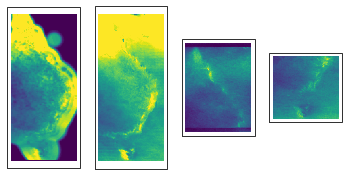

In [22]:
for i,name in enumerate(data):
    plt.subplot(1,4,i+1)
    iplt.pcolormesh(data[name]['wet days'].collapsed('time',iris.analysis.MEAN),vmin=0,vmax=0.5)

In [18]:
import iris.plot as iplt